In [40]:
# Notebook for analytics on the result of the republic referendum

### Libraries

In [41]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML, Image

In [42]:
filepath = '1999_referenda_output/republic_referendum_by_electorate_by_polling_place.csv'
df_results = pd.read_csv(
    filepath
)

display(df_results.head(3))

,index,state,electorate,polling_place,polling_place_raw,yes_or_no,yes_n,yes_p,no_n,no_p,formal_n,formal_p,informal_n,informal_p,total_n,total_p
0,0,SA,Adelaide,Adelaide,Adelaide (Adelaide),Yes,282,0.6144,177,0.3856,459,0.9871,6,0.0129,465,0.0057
1,1,SA,Adelaide,Adelaide East,Adelaide East,Yes,465,0.6700,229,0.3300,694,0.9914,6,0.0086,700,0.0086
2,2,SA,Adelaide,Adelaide Hospital,Adelaide Hospital,Yes,187,0.6172,116,0.3828,303,0.9806,6,0.0194,309,0.0038


In [43]:
filepath = '1999_referenda_output/republic_referendum_by_polling_place.csv'
df_results_by_pp = pd.read_csv(
    filepath
)

display(df_results_by_pp.head(3))

,state,polling_place,yes_n,no_n,formal_n,informal_n,total_n,yes_p,no_p,formal_p,informal_p
0,ACT,Ainslie,1372,500,1872,24,1896,0.7329,0.2671,0.9873,0.0127
1,ACT,Ainslie North,1608,749,2357,29,2386,0.6822,0.3178,0.9878,0.0122
2,ACT,Aranda,2200,787,2987,21,3008,0.7365,0.2635,0.9930,0.0070


In [44]:
filepath = '1999_referenda_output/polling_places_geocoded.csv'
df_pp = pd.read_csv(
    filepath
)

display(df_pp.head(3))

,state,polling_place,premises,address,suburb,postcode,wheelchair_access,match_source,match_type,latitude,longitude
0,ACT,Bonython,Bonython Primary School,Hurtle Ave,BONYTHON,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4318,149.083
1,ACT,Calwell,Calwell High School,Casey Cres,CALWELL,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4406,149.116
2,ACT,Canberra Hospital,The Canberra Hospital,Blding 2 Level 3 Yamba Dr,GARRAN,2605.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.3453,149.100


### Result by state/territory

* The ACT comfortably voted in favour, and was the only jurisdiction to do so
* Victoria was very narrowly opposed
* Queensland was almost 2 to 1 against

In [45]:
r = df_results[['state','yes_n','formal_n']].groupby('state').sum()
r['yes_p'] = round(r['yes_n']/r['formal_n'],4)
display(r.sort_values(['yes_p'],ascending=False))

,yes_n,formal_n,yes_p
state,,,
ACT,127211,201061,0.6327
VIC,1489536,2988674,0.4984
NT,44391,91028,0.4877
NSW,1817380,3913942,0.4643
SA,425869,977444,0.4357
WA,458306,1104826,0.4148
TAS,126271,312784,0.4037
QLD,784060,2094052,0.3744


### The inner cities were the most strongly in favour

The top 5 seats by proportion in favour represent two inner Melbourne and two inner Sydney seats, as well as one of the two Canberra seats

In [46]:
r = df_results[['electorate','yes_n','formal_n']].groupby('electorate').sum()
r['yes_p'] = round(r['yes_n']/r['formal_n'],4)
display(r.sort_values(['yes_p'],ascending=False).head(5))

,yes_n,formal_n,yes_p
electorate,,,
Melbourne,59994,84598,0.7092
Sydney,56921,83894,0.6785
Melbourne Ports,51520,78183,0.6590
Grayndler,51774,79929,0.6477
Fraser,64636,100266,0.6446


### Rural Australia was the most strongly opposed

The top 5 seats by proportion opposed are all large rural seats, four in Queensland and one (Gwydir) in NSW.

In [47]:
r = df_results[['electorate','yes_n','formal_n']].groupby('electorate').sum()
r['yes_p'] = round(r['yes_n']/r['formal_n'],4)
display(r.sort_values(['yes_p'],ascending=True).head(5))

,yes_n,formal_n,yes_p
electorate,,,
Maranoa,17944,78554,0.2284
Blair,18078,71299,0.2536
Wide Bay,19052,74205,0.2567
Groom,21406,78067,0.2742
Gwydir,19274,69355,0.2779


### How predictiveis the geographic size of seat on support for the referendum?

#### Prepare data

In [48]:
# import geographic size of seats
filepath = '1999_referenda/electorate_boundaries/boundaries_republic_referendum_aus.csv'

df_area = pd.read_csv(
    filepath,
    skiprows = 1,
    names = ['electorate','area_sqkm']
)

# make df grouped by electorate

df_by_electorate = df_results[['electorate','yes_n','formal_n']].groupby('electorate').sum()
df_by_electorate['yes_p'] = round(r['yes_n']/r['formal_n'],4)

df_by_electorate = df_by_electorate.reset_index()

# merge in area
df_by_electorate = pd.merge(df_by_electorate, df_area, on='electorate', how='left')

display(df_by_electorate.head(5))

,electorate,yes_n,formal_n,yes_p,area_sqkm
0,Adelaide,45580,80832,0.5639,80.80
1,Aston,43210,83822,0.5155,128.10
2,Ballarat,32784,80129,0.4091,11128.95
3,Banks,34719,75875,0.4576,61.70
4,Barker,26709,82364,0.3243,67077.85


#### create data for scatterplot

In [49]:
from plotly.offline import *
import plotly.offline as py
import plotly.plotly as pyonline
import plotly.graph_objs as go
init_notebook_mode(connected=True) # render plotly charts in the notebook on the fly

In [50]:
series = go.Scatter(
    y = df_by_electorate['yes_p'],
    x = df_by_electorate['area_sqkm'],
    name = '% Yes',
    mode = 'markers',
    text = df_by_electorate['electorate'],
    marker = dict (
        size = 10,
        opacity = 0.6
    )
)

xaxis=dict(
        title = 'Size of Electorate, SqKm',
        titlefont=dict(
            family='Open Sans',
            size=16
        )
)

yaxis = dict(
        title = '% Support',
        titlefont=dict(
            family='Open Sans',
            size=16
        ),
        tickformat = ',.0%',
        range=[.2,.8]
)

title = '1999 Republic Referendum - % Support vs. Size of Electorate'

titlefont = dict(
        family='Open Sans',
        size=22
)

layout = go.Layout(
    title = title,
    titlefont = titlefont,
    xaxis = xaxis,
    yaxis = yaxis
)

data = [series]

figure01 = go.Figure(data=data, layout=layout)

In [51]:
py.iplot(figure01, filename='figure01')
# pyonline.image.ishow(figure01, width=1500, height=750)

### Same chart, using a log scale for electorate size

In [52]:
xaxis=dict(
        title = 'Log of size of Electorate, SqKm',
        titlefont=dict(
            family='Open Sans',
            size=16
        ),
        type='log'
)

title = '1999 Republic Referendum - % Support vs. log(size) of Electorate'

layout = go.Layout(
    title = title,
    titlefont = titlefont,
    xaxis = xaxis,
    yaxis = yaxis
)

figure02 = go.Figure(data=data, layout=layout)

There appears to be a relatively strong relationship between % support for the republic, and size of electorate

Smaller electorates by area (i.e, more densely populated inner-urban electorates) are more likely to support the republic

A noteable outlier is the Northern Terirtory, the second largest electorate by area, still had 49% support

In [53]:
py.iplot(figure02, filename='figure02')
# pyonline.image.ishow(figure02, width=1500, height=750)

### How much does the size of the seat predict support for the republic?

In [54]:
import math
import statsmodels.formula.api as sm

# add log(area) var to df
df_by_electorate['area_sqkm_log'] = df_by_electorate['area_sqkm'].apply(lambda x: math.log(x))
df_by_electorate.head(3)

# run regression
result = sm.ols(formula="area_sqkm_log ~ yes_p", data=df_by_electorate).fit()

display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          area_sqkm_log   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     185.9
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           8.03e-28
Time:                        14:55:07   Log-Likelihood:                -301.06
No. Observations:                 148   AIC:                             606.1
Df Residuals:                     146   BIC:                             612.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.4038      0.703     23.338      0.000      15.015      17.793
yes_p        -20.8541      1.529    -13.635      0.000     -23.877     -17.831
==============================================================================
Omnibus:                       26.282   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.692
Skew:                           0.893   Prob(JB):                     8.84e-10
Kurtosis:                       4.889   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### You can explain 56% of the variation in support for the Republic with seat size

### Yes vote v size of polling place

In [55]:
series = go.Scatter(
    y = df_results_by_pp['yes_p'],
    x = df_results_by_pp['total_n'],
    name = '% Yes',
    mode = 'markers',
    text = df_results_by_pp['polling_place'],
    marker = dict (
        size = 10,
        opacity = 0.6
    )
)

xaxis=dict(
        title = 'Number of Votes',
        titlefont=dict(
            family='Open Sans',
            size=16
        )
)

yaxis = dict(
        title = '% Support',
        titlefont=dict(
            family='Open Sans',
            size=16
        ),
        tickformat = ',.0%'
)

title = '1999 Republic Referendum - % Support vs. Number of Votes by polling place'

titlefont = dict(
        family='Open Sans',
        size=22
)

layout = go.Layout(
    title = title,
    titlefont = titlefont,
    xaxis = xaxis,
    yaxis = yaxis
)

data = [series]

figure03 = go.Figure(data=data, layout=layout)

It's exceptionally noisy, but there is some relationship between % support for the republic a size of polling place

In [56]:
py.iplot(figure03, filename='figure03')
# pyonline.image.ishow(figure03, width=1500, height=750)

### Just for fun - is the republic referendum at all predictive of the 2016 federal election result?

In [57]:
import fiona
import geopandas as gp
from shapely.geometry import Point
%matplotlib inline

df_pp['geometry'] = df_pp.apply(lambda z: Point(z.longitude, z.latitude), axis=1)

df_pp_geom = gp.GeoDataFrame(df_pp)

df_pp_geom.head(3)

,state,polling_place,premises,address,suburb,postcode,wheelchair_access,match_source,match_type,latitude,longitude,geometry
0,ACT,Bonython,Bonython Primary School,Hurtle Ave,BONYTHON,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4318,149.083,POINT (149.083 -35.4318)
1,ACT,Calwell,Calwell High School,Casey Cres,CALWELL,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.4406,149.116,POINT (149.116 -35.4406)
2,ACT,Canberra Hospital,The Canberra Hospital,Blding 2 Level 3 Yamba Dr,GARRAN,2605.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.3453,149.100,POINT (149.1 -35.3453)


In [58]:
# display(df_pp_geom.plot())

#### 2016 polling places

In [59]:
filepath = '2016_federal_election_data/polling_places_2016.csv'
df_pp_2016 = pd.read_csv(
    filepath
)

display(df_pp_2016.head(3))

filepath = '2016_federal_election_data/two_party_preferred_by_polling_place_2016.csv'
df_sw_2016 = pd.read_csv(
    filepath
)

display(df_sw_2016.head(3))

,State,DivisionID,DivisionNm,PollingPlaceID,PollingPlaceTypeID,PollingPlaceNm,PremisesNm,PremisesAddress1,PremisesAddress2,PremisesAddress3,PremisesSuburb,PremisesStateAb,PremisesPostCode,Latitude,Longitude
0,ACT,101,Canberra,8829,1,Barton,Telopea Park School,New South Wales Cres,NaN,NaN,BARTON,ACT,2600.0,-35.315100,149.135000
1,ACT,101,Canberra,64583,5,Belconnen CANBERRA PPVC,Belconnen Community Centre,26 Chandler St,NaN,NaN,BELCONNEN,ACT,2900.0,-35.238904,149.070109
2,ACT,101,Canberra,65504,5,BLV Canberra PPVC,BLV Canberra,50 Marcus Clarke St,NaN,NaN,CANBERRA CITY,ACT,2601.0,-35.279054,149.126379


,StateAb,DivisionID,DivisionNm,PollingPlaceID,PollingPlace,Liberal/National Coalition Votes,Liberal/National Coalition Percentage,Australian Labor Party Votes,Australian Labor Party Percentage,TotalVotes,Swing
0,ACT,101,Canberra,8829,Barton,991,44.40,1241,55.60,2232,2.19
1,ACT,101,Canberra,64583,Belconnen CANBERRA PPVC,446,39.86,673,60.14,1119,0.57
2,ACT,101,Canberra,65504,BLV Canberra PPVC,16,48.48,17,51.52,33,15.15


In [60]:
def left_of_bracket(s):
    if '(' in s:
        needle = s.find('(')
        r = s[:needle-1].strip()
        return r
    else:
        return s

lambda_polling_places = lambda x: left_of_bracket(x)

# just ordinary polling places
df_pp_2016 = df_pp_2016[df_pp_2016['PollingPlaceTypeID'] == 1]

# make a seat-independent polling place column
df_pp_2016['polling_place'] = df_pp_2016['PollingPlaceNm'].apply(lambda_polling_places)

# filter for relevant columns
df_pp_2016 = df_pp_2016[[
    'State',
    'polling_place',
    'Latitude',
    'Longitude'
]]

# make headers lower case
df_pp_2016.columns = [x.lower() for x in df_pp_2016.columns]

# de dup
df_pp_2016.drop_duplicates()

df_pp_2016.head(3)

df_pp_2016.to_csv(
    '2016_federal_election_data/polling_places_2016_ordinary.csv'
)

In [61]:
df_pp_2016['geometry'] = df_pp_2016.apply(lambda z: Point(z.longitude, z.latitude), axis=1)

df_pp_2016_geom = gp.GeoDataFrame(df_pp_2016)

df_pp_2016_geom.head(3)

,state,polling_place,latitude,longitude,geometry
0,ACT,Barton,-35.31510,149.13500,POINT (149.135 -35.3151)
3,ACT,Bonython,-35.43180,149.08300,POINT (149.083 -35.4318)
4,ACT,Braddon,-35.27363,149.14001,POINT (149.14001 -35.27363)


In [30]:
# df_pp_2016_geom.index.rename('pp_2016', inplace=True)
# df_pp_2016_geom.head(3)

,state,polling_place,latitude,longitude,geometry
pp_2016,,,,,
0,ACT,Barton,-35.31510,149.13500,POINT (149.135 -35.3151)
3,ACT,Bonython,-35.43180,149.08300,POINT (149.083 -35.4318)
4,ACT,Braddon,-35.27363,149.14001,POINT (149.14001 -35.27363)


In [63]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

# makes geometry points for each pp
pts = df_pp_2016_geom.geometry.unary_union

# for a given point return nearest poling place
def near(point, polling_places=pts):
    # get the data point from df_pp_2016_geom for which geometry = the geometry of the nearest point
    nearest = df_pp_2016_geom.geometry == nearest_points(point,polling_places)[1]
    # return the index col of pp_2016
    return df_pp_2016_geom[nearest].index.get_values()[0]

# test run, limit dataset
df_pp_geom = df_pp_geom.head(5)

# run 'near' into a new column on the 1999 data frame
df_pp_geom['pp_2016_index'] = df_pp_geom.apply(lambda row: near(row.geometry), axis=1)

display(df_pp_geom)

,state,polling_place,premises,address,suburb,postcode,wheelchair_access,match_source,match_type,latitude,longitude,geometry,Nearest,pp_2016_index
0,ACT,Bonython,Bonython Primary School,Hurtle Ave,BONYTHON,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.431800,149.083000,POINT (149.083 -35.4318),3,3
1,ACT,Calwell,Calwell High School,Casey Cres,CALWELL,2905.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.440600,149.116000,POINT (149.116 -35.4406),5,5
2,ACT,Canberra Hospital,The Canberra Hospital,Blding 2 Level 3 Yamba Dr,GARRAN,2605.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.345300,149.100000,POINT (149.1 -35.3453),19,19
3,ACT,Chapman,Chapman Primary School,Perry Dr,CHAPMAN,2611.0,F,2007 Polling Places,"Match 01 - state, premises, postcode",-35.356900,149.043000,POINT (149.043 -35.3569),7,7
4,ACT,Chifley,Melrose Primary School,Maclaurin Cres,CHIFLEY,2606.0,A,google geocode,GEOMETRIC_CENTER,-35.350298,149.081043,POINT (149.0810432 -35.350298),31,31


,Place,geometry
0,Work,POINT (0 1.1)
1,Shops,POINT (2.5 2)
2,Home,POINT (1 1.1)


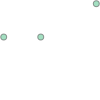

,Name,ID,geometry,Nearest
0,John,1,POINT (1 1),Home
1,Smith,1,POINT (2 2),Shops
2,Soap,1,POINT (0 2),Work


In [39]:
import geopandas as gpd
from shapely.geometry import Point

gpd1 = gpd.GeoDataFrame(
    [['John',1,Point(1,1)],
     ['Smith',1,Point(2,2)],
     ['Soap',1,Point(0,2)]],
    columns=['Name','ID','geometry']
)
gpd2 = gpd.GeoDataFrame(
    [['Work',Point(0,1.1)],
     ['Shops',Point(2.5,2)],
     ['Home',Point(1,1.1)]],
    columns=['Place','geometry']
)
display(gpd2)
pts3 = gpd2.geometry.unary_union


display(pts3)
def near(point, pts=pts3):
    # find the nearest point and return the corresponding Place value
    nearest = gpd2.geometry == nearest_points(point, pts)[1]
    return gpd2[nearest].Place.get_values()[0]

gpd1['Nearest'] = gpd1.apply(lambda row: near(row.geometry), axis=1)
gpd1

In [ ]:
def near(point, pts=pts3):
    # find the nearest point and return the corresponding Place value
    nearest = gpd2.geometry == nearest_points(point, pts)[1]
    return gpd2[nearest].Place.get_values()[0]

In [23]:
#https://gis.stackexchange.com/questions/222315/geopandas-find-nearest-point-in-other-dataframe
from shapely.ops import nearest_points
# unary union of the gpd2 geomtries 
pts3 = gpd2.geometry.unary_union
def near(point, pts=pts3):
     # find the nearest point and return the corresponding Place value
     nearest = gpd2.geometry == nearest_points(point, pts)[1]
     return gpd2[nearest].Place.get_values()[0]
gpd1['Nearest'] = gpd1.apply(lambda row: near(row.geometry), axis=1)
gpd1

NameError: name 'gpd2' is not defined